In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.iloc[:,0:10].head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0


In [12]:
df.iloc[:,10:].head(5)

,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [14]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [15]:
exclude_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Convert all other columns to categorical, except the ones in 'exclude_columns'
for column in df.columns:
    if column not in exclude_columns:
        df[column] = df[column].astype('category')

df.dtypes

Diabetes_012            category
HighBP                  category
HighChol                category
CholCheck               category
BMI                      float64
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                  float64
MentHlth                 float64
PhysHlth                 float64
DiffWalk                category
Sex                     category
Age                      float64
Education                float64
Income                   float64
dtype: object

In [13]:
print(df.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [17]:
def detect_outliers(df, column_name):

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
    return outliers

outlier_indices = detect_outliers(df, exclude_columns)
df[outlier_indices].count()

# To remove outliers
# df = df[~outlier_indices]

Diabetes_012                0
HighBP                      0
HighChol                    0
CholCheck                   0
BMI                      9847
Smoker                      0
Stroke                      0
HeartDiseaseorAttack        0
PhysActivity                0
Fruits                      0
Veggies                     0
HvyAlcoholConsump           0
AnyHealthcare               0
NoDocbcCost                 0
GenHlth                 12081
MentHlth                36208
PhysHlth                40949
DiffWalk                    0
Sex                         0
Age                         0
Education                   0
Income                      0
dtype: int64

In [24]:
def visualize_data(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            if len(df[column].unique()) > 10:
                # Plot histogram and boxplot for continuous variables
                fig, axs = plt.subplots(1, 2, figsize=(10, 4))
                sns.histplot(df[column], kde=True, ax=axs[0])
                axs[0].set_title(f'Histogram of {column}')
                sns.boxplot(x=df[column], ax=axs[1])
                axs[1].set_title(f'Boxplot of {column}')
                plt.tight_layout()
            else:
                # Plot bar chart for discrete variables
                plt.figure(figsize=(4, 3))
                sns.countplot(x=column, data=df)
                plt.title(f'Count of {column}')
                plt.tight_layout()
            plt.show()
        else:
            # For non-numeric data types, plot a bar chart
            plt.figure(figsize=(4, 3))
            sns.countplot(x=column, data=df)
            plt.title(f'Count of {column}')
            plt.tight_layout()
            plt.show()


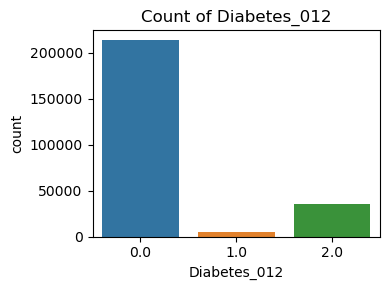

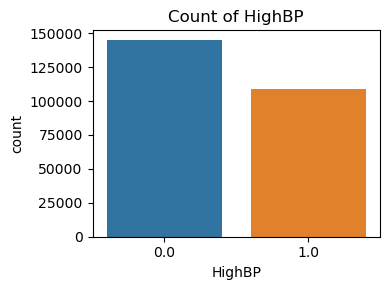

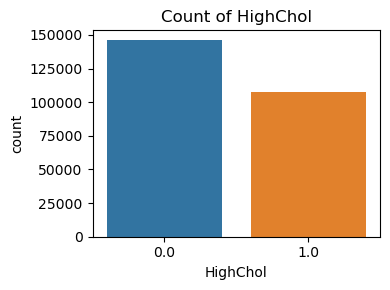

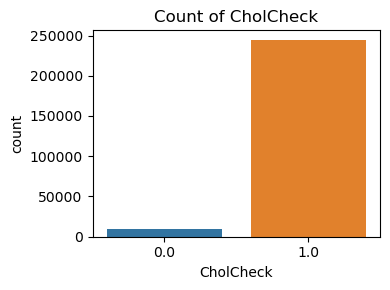

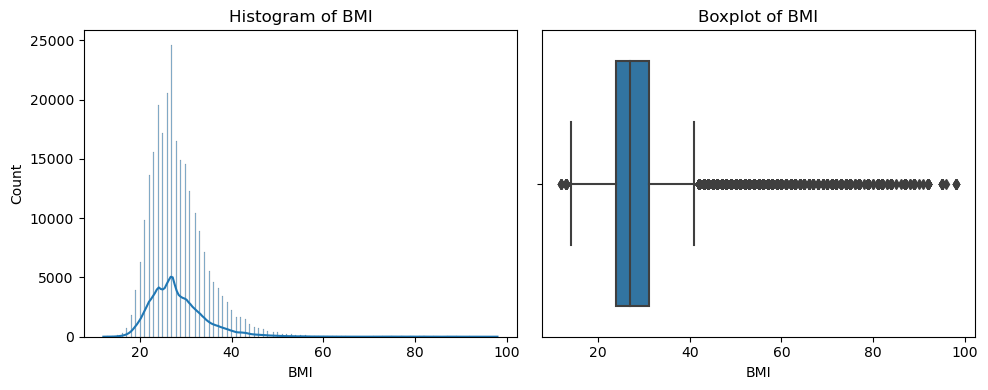

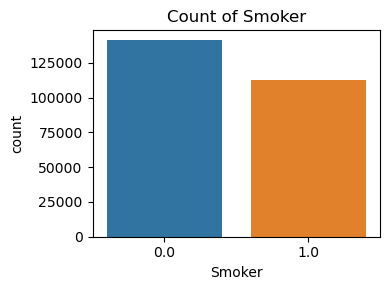

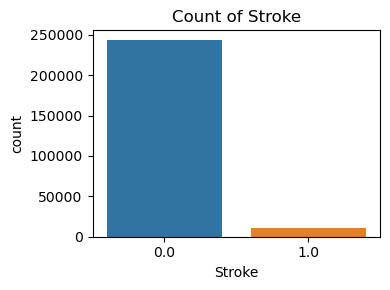

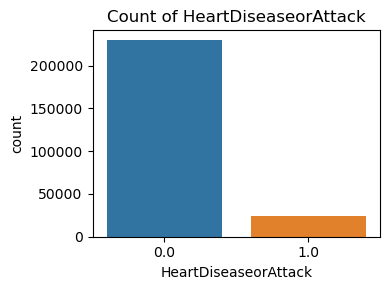

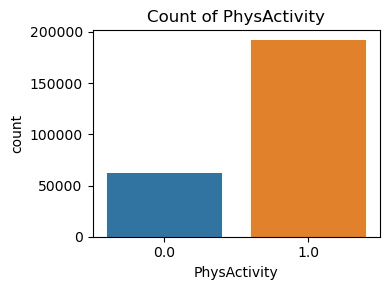

In [25]:
visualize_data(df.iloc[:,0:9])

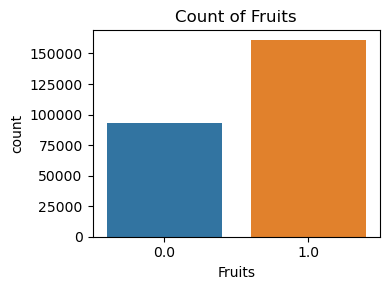

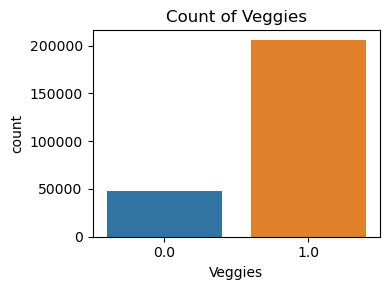

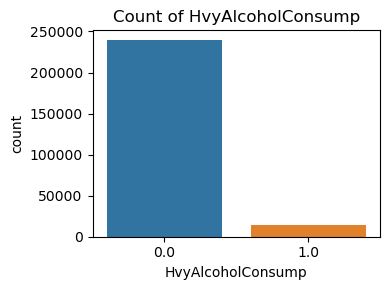

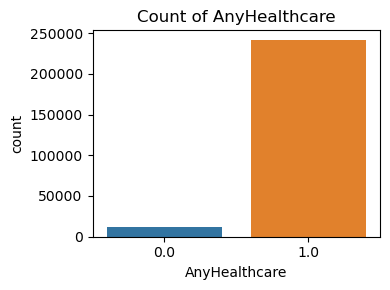

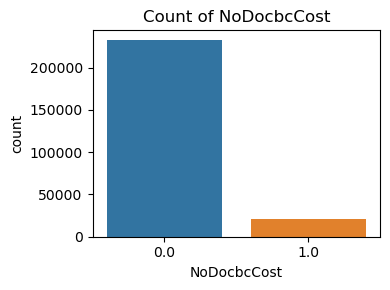

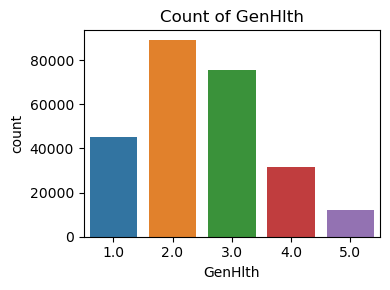

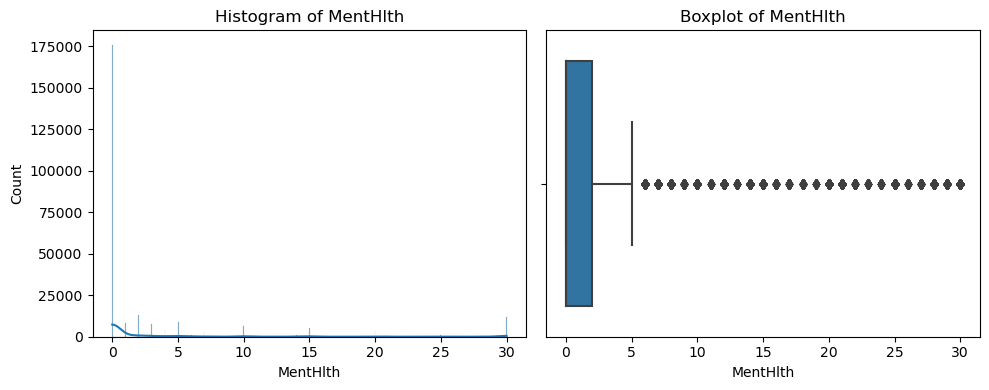

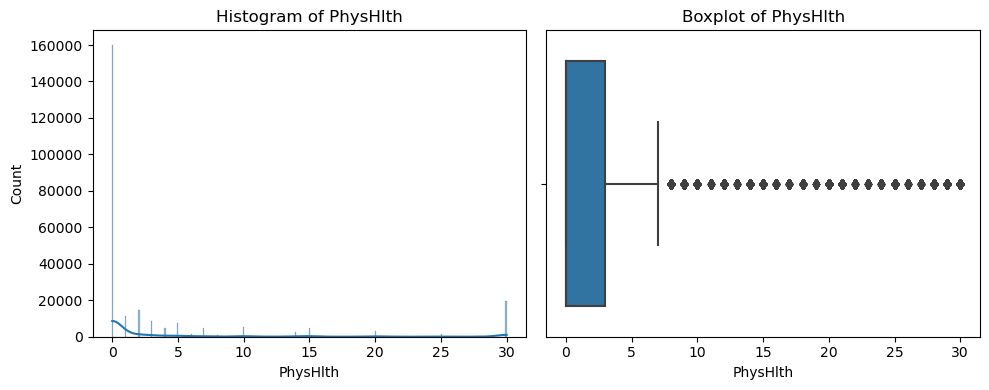

In [26]:
visualize_data(df.iloc[:,9:17])

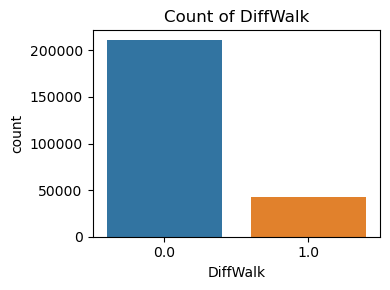

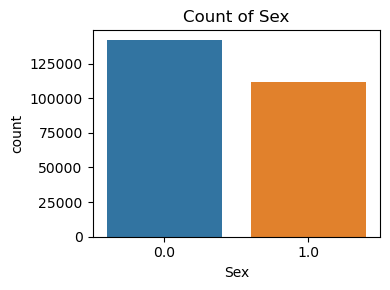

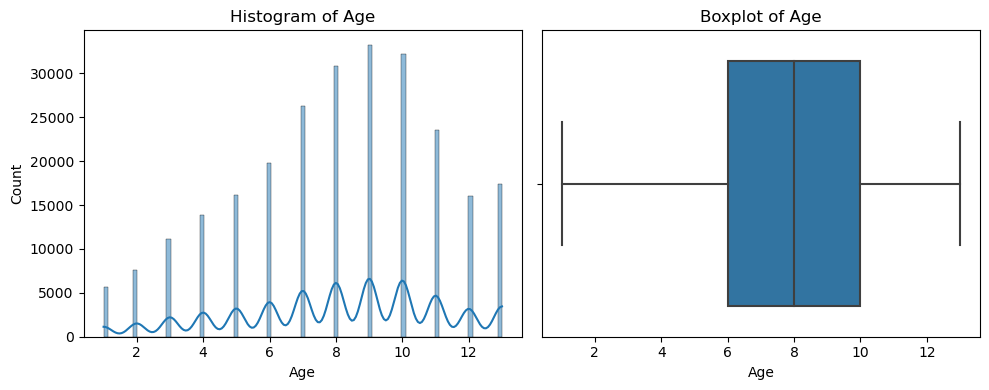

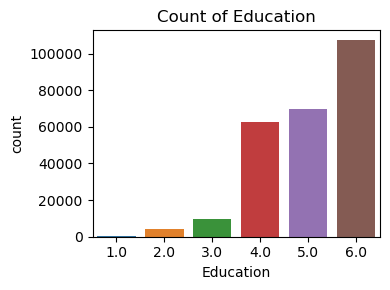

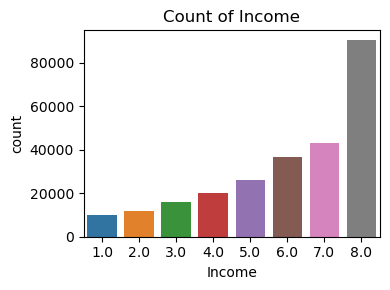

In [27]:
visualize_data(df.iloc[:,17:])

In [30]:
df.dtypes

Diabetes_012            category
HighBP                  category
HighChol                category
CholCheck               category
BMI                      float64
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                  float64
MentHlth                 float64
PhysHlth                 float64
DiffWalk                category
Sex                     category
Age                      float64
Education                float64
Income                   float64
dtype: object

In [31]:
# From visualization, we realize the following are also categorical. Thus we convert them as well.
convert_columns = ['GenHlth', 'Age', 'Education', 'Income']

for column in df.columns:
    if column in convert_columns:
        df[column] = df[column].astype('category')

df.dtypes

Diabetes_012            category
HighBP                  category
HighChol                category
CholCheck               category
BMI                      float64
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                 category
MentHlth                 float64
PhysHlth                 float64
DiffWalk                category
Sex                     category
Age                     category
Education               category
Income                  category
dtype: object

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [36]:
# 'Diabetes_012' is the target variable
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/Users/chenyiqi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [38]:
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Accuracy, Precision, Recall, and F1 Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Adjust average as per your requirement
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Confusion Matrix:
 [[62658     0  1522]
 [ 1313     0   112]
 [ 8643     0  1856]]
Accuracy: 0.85
Precision: 0.80
Recall: 0.85
F1 Score: 0.81


/Users/chenyiqi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


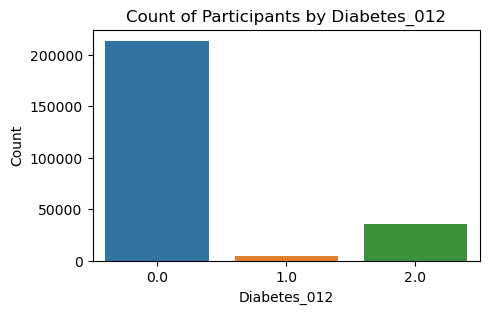

In [41]:
# The simple model is too good. 
# As we suffering from IMBALANCED data, we are sceptical of how our model actual perform.
# Suggest resampling or other strategy

plt.figure(figsize=(5, 3))
sns.countplot(x='Diabetes_012', data=df)
plt.title('Count of Participants by Diabetes_012')
plt.xlabel('Diabetes_012')
plt.ylabel('Count')
plt.show()

In [42]:
df['Diabetes_012'].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

In [43]:
# Close to measurement result. We may say our simple logistic regression predict all value to be 0.
213703/(213703+35346+4631) 

0.8424116997792495